In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [60]:
df = pd.read_csv('drake_data.csv')

In [61]:
df.head()[:2]

,album,lyrics_title,lyrics_url,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,https://genius.com/Drake-certified-lover-boy-lyrics,"[Verse]\nPut my feelings on ice\nAlways been a gem\nCertified lover boy, somehow still heartless\nHeart is only gettin' colder",8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,https://genius.com/Drake-like-im-supposed-to-do-things-lyrics,"[Verse]\nHands are tied\nSomeone's in my ear from the other side\nTellin' me that I should pay you no mind\nWanted you to not be with me all night\nWanted you to not stay with me all night\nI know, you know, who that person is to me\nDoesn't really change things\n\n[Chorus]\nI know you're scared of dating, falling for me\nShorty, surely you know me\nRight here for you always\nYou know, I don't ever change\nRight here for you always\nYou know I don't ever change\nRight here for you\n\n[Bridge]\nIn mind you make me want to do things, love you\nLike I'm supposed to\nYou make me want to love you\nLike I'm supposed to\nYou make me want to love you\nLike I'm supposed to, remind you\nAyy\n\n[Chorus]\nI know you're scared of dating, falling for me\nShorty, by now you know me\nRight here for you always\nYou know, I don't ever change\nRight here for you always\nYou know I don't ever change\nRight here for you",38.8K


In [62]:
df.drop('lyrics_url',1, inplace=True)

In [63]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-63-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [64]:
df.head(1)

,album,lyrics_title,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,"[Verse]\nPut my feelings on ice\nAlways been a gem\nCertified lover boy, somehow still heartless\nHeart is only gettin' colder",8.7K


In [73]:
df1 = df.copy()

## REGEX

In [74]:
# Converts to a string type
df1['lyrics'] = df1['lyrics'].astype(str)

In [75]:
# Removes the Escape Character
df1['lyrics'] = df1['lyrics'].apply(lambda x : x.replace('\n',' '))

In [76]:
# Removes the Square Brackets
df1['lyrics'] = df1['lyrics'].apply(lambda x : re.sub('\[[^\]]*\]', '', x))

In [77]:
# Removes the Quotation Marks
df1['lyrics'] = df1['lyrics'].apply(lambda x : re.sub('[^\w\s]','',x))

In [78]:
# Removes the Numbers
df1['lyrics'] = df1['lyrics'].apply(lambda x : re.sub('\w*\d\w*','',x))

In [79]:
df1[:3]

,album,lyrics_title,lyrics,track_views
0,Certified Lover Boy,Certified Lover Boy* Lyrics,Put my feelings on ice Always been a gem Certified lover boy somehow still heartless Heart is only gettin colder,8.7K
1,Certified Lover Boy,Like I’m Supposed To/Do Things Lyrics,Hands are tied Someones in my ear from the other side Tellin me that I should pay you no mind Wanted you to not be with me all night Wanted you to not stay with me all night I know you know who that person is to me Doesnt really change things I know youre scared of dating falling for me Shorty surely you know me Right here for you always You know I dont ever change Right here for you always You know I dont ever change Right here for you In mind you make me want to do things love you Like Im supposed to You make me want to love you Like Im supposed to You make me want to love you Like Im supposed to remind you Ayy I know youre scared of dating falling for me Shorty by now you know me Right here for you always You know I dont ever change Right here for you always You know I dont ever change Right here for you,38.8K
2,Certified Lover Boy,Not Around Lyrics,Yeah we back Wassup ladies Swishahouse baby Wassup to all the ladies on the Northside Southside Eastside Westside Wassup in Bay City Wassup to all the ladies in Louisiana Wassup to all the ladies in Dallas Austin San Antonio Marshall Prairie View its going down Wharton County Texas City HTown baby TSU ladies She moved out of state and shit done went left shes seekin forgiveness She used to dance but she want a loan and start up a business Her daddy is not around her momma is not around I watch her climb to the top of the pole and then get to slidin down I make it rain in this bitch I make it snow in this bitch She tryna get out of the mix Shawty is goin legit shawty is goin legit Me Im supportin this shit this is a story Came from my life and Im just recordin this shit Ima just give it to you direct instead of me throwin this shit You know you important and shit You know Im supportin this shit We used to do pornos when you would come over but now you got morals and shit I got like four on the wrist and an adorable kid I got the drac in the studio and I dont just mean that Im in this bitch Please make the most of this shit Dont just come close to some shit I give you this bread you run me some head And then you go glow up a bit She moved out of state and shit done went left shes seekin forgiveness She used to dance but she want a loan and start up a business Her daddy is not around her momma is not around I watch her climb to the top of the pole and then get to sli I make it rain in this bitch I make it snow in this bitch She tryna get out of the mix Shawty is goin legit shawty is goin legit Me Im supportin this shit this is a story Came from my life and Im just recordin this shit Her daddy is not around momma is definitely not around She got a business plan but she just aint had time to write it down Stay with her sister now she got a man but he out of town Soon as he out of town they hop in his whip and they ride around I watch her climb to the top of the pole and then get to slidin slidin Thought about trappin a player before but that just aint right right Look in the mirror if you wanna look at some things on the bright side You popped a you feelin too good to worry tonight She moved out of state and shit done went left shes seekin forgiveness She used to dance but she want a loan and start up a business Her daddy is not around her momma is not around I watch her climb to the top of the pole and then get to sli I make it rain in this bitch I make it snow in this bitch She tryna get out of the mix Shawty is goin legit shawty is goin legit Me Im supportin this shit this is a story Came for my life and Im just recordin this shit,129.8K


In [84]:
test_df = df1.groupby('album').agg(lambda x: x.tolist())
test_df.drop(['lyrics_title','track_views'],1,inplace=True)
test_df['lyrics'] = test_df['lyrics'].apply(lambda x : ' '.join(x))
test_df.head(1)

lyrics
album                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [85]:
data_corpus = test_df.copy()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

In [87]:
data_ly = cv.fit_transform(data_corpus.lyrics)
data_dtm = pd.DataFrame(data_ly.toarray(), columns=cv.get_feature_names())

data_dtm.index = data_corpus.index
data_dtm.head()

,___,aa,aaliyah,aaliyahs,aaron,aberlour,ablaze,able,abridge,absolutely,...,zip,zippers,ziti,zo,zodiac,zoe,zombie,zone,zonin,zs
album,,,,,,,,,,,,,,,,,,,,,
Care Package,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Certified Lover Boy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Comeback Season,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
Dark Lane Demo Tapes,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drake Demo Disk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
data = data_dtm.transpose()
data.head()

album,Care Package,Certified Lover Boy,Comeback Season,Dark Lane Demo Tapes,Drake Demo Disk,If You’re Reading This It’s Too Late,More Life,Nothing Was the Same,Room for Improvement,Scary Hours,Scorpion,So Far Gone,So Far Gone (EP),Take Care,Thank Me Later,The Best in the World Pack,Unreleased Songs,Views
___,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aa,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
aaliyah,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
aaliyahs,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
aaron,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
top_dict = {}
for c in data.columns:
    top =data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [90]:
top_dict

{'Care Package': [('im', 115),
  ('know', 95),
  ('like', 90),
  ('yeah', 88),
  ('just', 88),
  ('dont', 85),
  ('shit', 70),
  ('fuck', 61),
  ('oh', 59),
  ('got', 55),
  ('thats', 55),
  ('right', 45),
  ('say', 42),
  ('man', 40),
  ('nigga', 40),
  ('niggas', 40),
  ('cause', 38),
  ('aint', 37),
  ('tell', 32),
  ('love', 28),
  ('boy', 28),
  ('baby', 27),
  ('ha', 27),
  ('ooh', 26),
  ('think', 26),
  ('girl', 25),
  ('need', 24),
  ('time', 24),
  ('bout', 24),
  ('guess', 23)],
 'Certified Lover Boy': [('know', 33),
  ('im', 33),
  ('like', 32),
  ('just', 27),
  ('shit', 22),
  ('baby', 19),
  ('dont', 18),
  ('niggas', 15),
  ('need', 15),
  ('tell', 14),
  ('make', 14),
  ('got', 13),
  ('took', 13),
  ('lie', 12),
  ('youre', 12),
  ('aint', 11),
  ('way', 11),
  ('yeah', 11),
  ('right', 10),
  ('want', 10),
  ('love', 9),
  ('cause', 9),
  ('goin', 9),
  ('thing', 9),
  ('say', 9),
  ('lot', 9),
  ('used', 8),
  ('shawty', 8),
  ('bitch', 8),
  ('time', 7)],
 'Comebac

In [22]:
[f'{i} = {top_dict[i][:5]}' for i in top_dict]

["Care Package = [('im', 115), ('know', 95), ('like', 90), ('yeah', 88), ('just', 88)]",
 "Certified Lover Boy = [('know', 33), ('im', 33), ('like', 32), ('just', 27), ('shit', 22)]",
 "Comeback Season = [('im', 210), ('like', 165), ('know', 107), ('dont', 93), ('aint', 78)]",
 "Dark Lane Demo Tapes = [('yeah', 128), ('know', 92), ('im', 90), ('ayy', 85), ('got', 66)]",
 "Drake Demo Disk = [('im', 22), ('like', 21), ('haters', 13), ('wanna', 13), ('break', 13)]",
 "If You’re Reading This It’s Too Late = [('im', 214), ('yeah', 114), ('know', 102), ('like', 98), ('got', 83)]",
 "More Life = [('im', 137), ('know', 113), ('yeah', 107), ('like', 104), ('just', 73)]",
 "Nothing Was the Same = [('just', 125), ('like', 101), ('know', 92), ('im', 91), ('dont', 89)]",
 "Room for Improvement = [('im', 129), ('like', 80), ('know', 80), ('uh', 76), ('just', 76)]",
 "Scary Hours = [('wishin', 26), ('like', 16), ('yeah', 13), ('things', 10), ('ayy', 9)]",
 "Scorpion = [('im', 124), ('yeah', 117), ('k

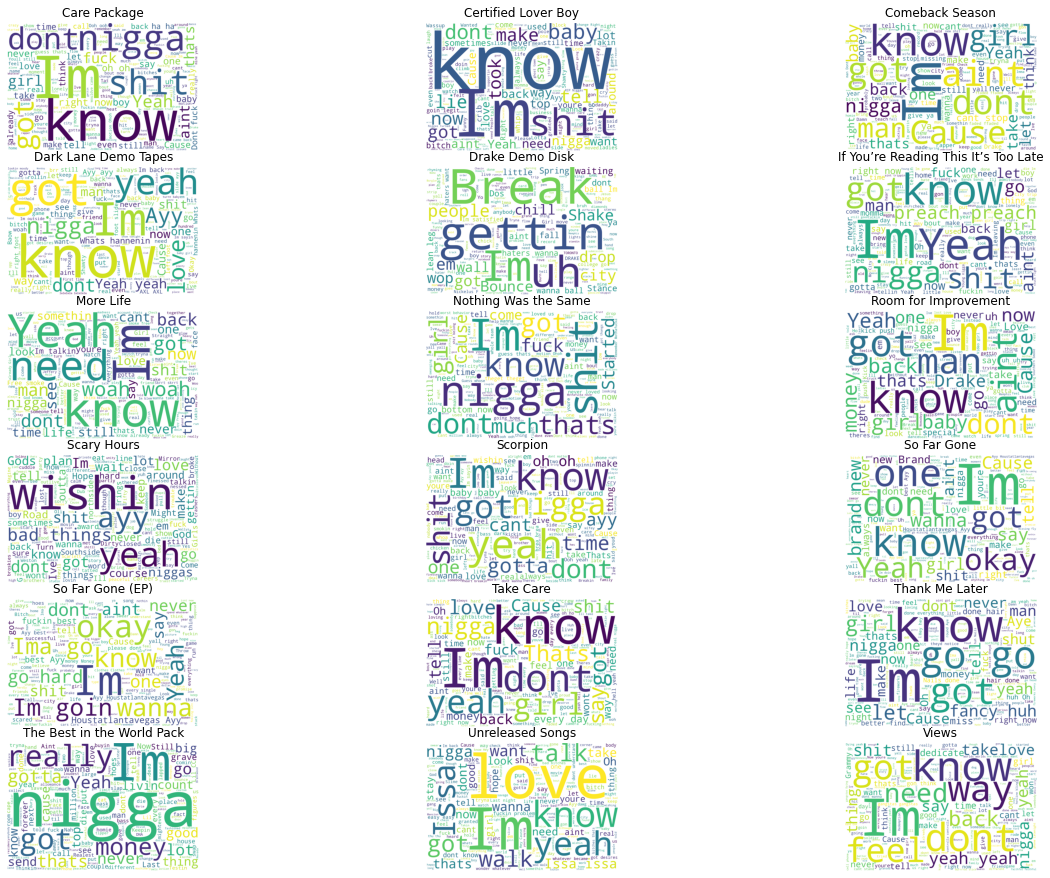

In [23]:
from wordcloud import WordCloud

fig = plt.figure(figsize = (25, 12))

for num,album in enumerate(data_corpus.index):

    axs = fig.add_subplot(6, 3, num+1, facecolor = None)
    
    wordcloud = WordCloud(width = 1800, height = 1200, 
                    background_color ='white', 
                    min_font_size = 10).generate(data_corpus.lyrics[album]) 
    
    axs.imshow(wordcloud) 
    plt.axis("off")
    plt.title(album)
    plt.tight_layout(pad = 0) 

plt.show() 

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Jahaan
[nltk_data]     Nadkarni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
data_corpus['tokenized_sents'] = data_corpus.apply(lambda row: nltk.word_tokenize(row['lyrics']), axis=1)

In [26]:
tokens = data_corpus['tokenized_sents']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tf_vector = TfidfVectorizer()

In [29]:
vect = tf_vector.fit_transform(data_corpus.lyrics)

In [30]:
print(vect.shape)

(18, 8600)


In [31]:
tf_transf = pd.DataFrame(vect.toarray().transpose(),
                   index=tf_vector.get_feature_names())

In [32]:
tf_transf.columns = data.columns

In [33]:
tf_transf

album,Care Package,Certified Lover Boy,Comeback Season,Dark Lane Demo Tapes,Drake Demo Disk,If You’re Reading This It’s Too Late,More Life,Nothing Was the Same,Room for Improvement,Scary Hours,Scorpion,So Far Gone,So Far Gone (EP),Take Care,Thank Me Later,The Best in the World Pack,Unreleased Songs,Views
___,0.000000,0.0,0.002900,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
aa,0.000000,0.0,0.002900,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
aaliyah,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002923,0.0,0.0,0.000000,0.000000
aaliyahs,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002923,0.0,0.0,0.000000,0.000000
aaron,0.000000,0.0,0.000000,0.0,0.0,0.003847,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoe,0.000000,0.0,0.000000,0.0,0.0,0.003847,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
zombie,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.003354,0.0,0.000000,0.003003,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
zone,0.002091,0.0,0.001465,0.0,0.0,0.001943,0.004236,0.001935,0.0,0.000000,0.000000,0.004267,0.003524,0.000000,0.0,0.0,0.002588,0.005707
zonin,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.029765,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


Remove the Top most common words from the corpus and then build a second wordcloud

In [34]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [35]:
# Print the top 15 words said by each comedian
for album, top_words in top_dict.items():
    print(album)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Care Package
im, know, like, yeah, just, dont, shit, fuck, oh, got, thats, right, say, man
---
Certified Lover Boy
know, im, like, just, shit, baby, dont, niggas, need, tell, make, got, took, lie
---
Comeback Season
im, like, know, dont, aint, girl, man, cause, got, just, ya, wanna, shit, yeah
---
Dark Lane Demo Tapes
yeah, know, im, ayy, got, like, just, love, dont, baby, man, whats, niggas, shit
---
Drake Demo Disk
im, like, haters, wanna, break, gettin, people, uh, em, city, just, wop, got, drop
---
If You’re Reading This It’s Too Late
im, yeah, know, like, got, preach, aint, man, shit, just, dont, nigga, right, girl
---
More Life
im, know, yeah, like, just, woah, got, need, dont, somethin, man, thats, shit, love
---
Nothing Was the Same
just, like, know, im, dont, shit, thats, got, nigga, girl, yeah, fuck, guess, started
---
Room for Improvement
im, like, know, uh, just, got, man, dont, aint, girl, baby, cause, yeah, money
---
Scary Hours
wishin, like, yeah, things, ayy, bad, dont,

In [36]:
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for album in data.columns:
    top = [word for (word, count) in top_dict[album]]
    for t in top:
        words.append(t)
        
print(len(words))

540


In [37]:
Counter(words).most_common()[:20]

[('im', 18),
 ('like', 18),
 ('got', 18),
 ('know', 17),
 ('yeah', 17),
 ('just', 17),
 ('dont', 16),
 ('love', 15),
 ('shit', 14),
 ('cause', 13),
 ('aint', 13),
 ('thats', 12),
 ('niggas', 12),
 ('need', 12),
 ('say', 11),
 ('tell', 11),
 ('wanna', 11),
 ('right', 10),
 ('man', 10),
 ('girl', 10)]

In [38]:
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words[:20]

['im',
 'like',
 'got',
 'know',
 'yeah',
 'just',
 'dont',
 'love',
 'shit',
 'cause',
 'aint',
 'thats',
 'niggas',
 'need',
 'say',
 'tell',
 'wanna',
 'right',
 'man',
 'girl']

In [39]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
# data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_corpus.lyrics)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_corpus.index


In [40]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [41]:
data_stop.index

Index(['Care Package', 'Certified Lover Boy', 'Comeback Season',
       'Dark Lane Demo Tapes', 'Drake Demo Disk',
       'If You’re Reading This It’s Too Late', 'More Life',
       'Nothing Was the Same', 'Room for Improvement', 'Scary Hours',
       'Scorpion', 'So Far Gone', 'So Far Gone (EP)', 'Take Care',
       'Thank Me Later', 'The Best in the World Pack', 'Unreleased Songs',
       'Views'],
      dtype='object', name='album')

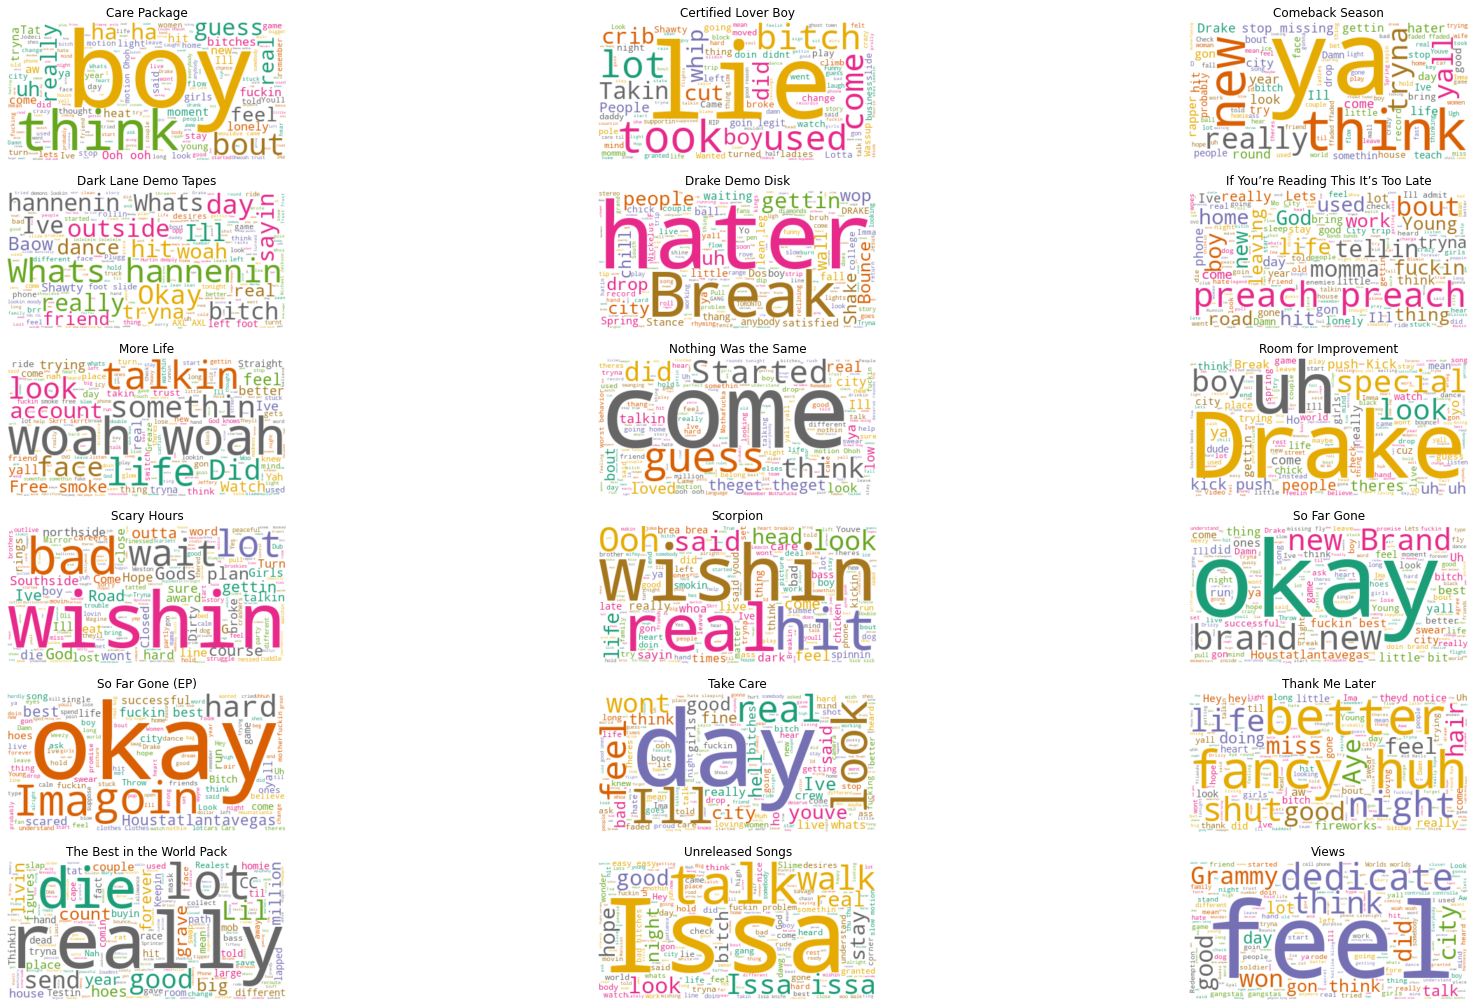

In [43]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 18]

# Create subplots for each album
for index, album in enumerate(data.columns):
    wc.generate(data_corpus.lyrics[album])
    
    plt.subplot(6, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data_stop.index[index])
    
plt.show()

In [44]:
pd.set_option('display.max_colwidth', 150)

In [45]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_corpus['polarity'] = data_corpus['lyrics'].apply(pol)
data_corpus['subjectivity'] = data_corpus['lyrics'].apply(sub)
data_corpus

,lyrics,tokenized_sents,polarity,subjectivity
album,,,,
Care Package,Oohoohooh oohoohoohooh Oohoohooh oohoohoohooh Oohoohooh oohoohoohooh Oohoohooh oohooh oohooh Dont fuck with me dont fuck with me Dont fuck with...,"[Oohoohooh, oohoohoohooh, Oohoohooh, oohoohoohooh, Oohoohooh, oohoohoohooh, Oohoohooh, oohooh, oohooh, Dont, fuck, with, me, dont, fuck, with, me,...",0.004904,0.535444
Certified Lover Boy,Put my feelings on ice Always been a gem Certified lover boy somehow still heartless Heart is only gettin colder Hands are tied Someones in my e...,"[Put, my, feelings, on, ice, Always, been, a, gem, Certified, lover, boy, somehow, still, heartless, Heart, is, only, gettin, colder, Hands, are, ...",0.030013,0.479929
Comeback Season,You see the difference between me and you is that I just hit rock bottom After this I dont have a choice I got people to provide for promises Ive...,"[You, see, the, difference, between, me, and, you, is, that, I, just, hit, rock, bottom, After, this, I, dont, have, a, choice, I, got, people, to...",0.033746,0.480767
Dark Lane Demo Tapes,For my nigga Hush Yeah look Dressed in fatigues I rep the East with my trustees Smokin on crushed leaves They turn they back on everything we b...,"[For, my, nigga, Hush, Yeah, look, Dressed, in, fatigues, I, rep, the, East, with, my, trustees, Smokin, on, crushed, leaves, They, turn, they, ba...",0.062027,0.456619
Drake Demo Disk,This the record that my backpack underground fans get to get to skippin Back back Southern town fans get to tippin Chasin fat stacks runnin down ...,"[This, the, record, that, my, backpack, underground, fans, get, to, get, to, skippin, Back, back, Southern, town, fans, get, to, tippin, Chasin, f...",0.052559,0.501817
If You’re Reading This It’s Too Late,Yeah When I pull up on a nigga tell that nigga back back Im too good with these words watch a nigga backtrack If I die all I know is Im a mot...,"[Yeah, When, I, pull, up, on, a, nigga, tell, that, nigga, back, back, Im, too, good, with, these, words, watch, a, nigga, backtrack, If, I, die, ...",-0.024355,0.525562
More Life,Is it the strength of your feelings Overthrowing your pain Youll see new heights youll be reaching And is it today that you will find your new re...,"[Is, it, the, strength, of, your, feelings, Overthrowing, your, pain, Youll, see, new, heights, youll, be, reaching, And, is, it, today, that, you...",0.071257,0.472763
Nothing Was the Same,Yeah alright yeah Comin off the last record Im gettin million off the record Just to off these records nigga thats a record Im livin like Im...,"[Yeah, alright, yeah, Comin, off, the, last, record, Im, gettin, million, off, the, record, Just, to, off, these, records, nigga, thats, a, record...",0.065619,0.548520
Room for Improvement,Yo whats going on This is Drake And Ima let you know what you about to witness This right here is a Drake and DJ Smallz collaboration So Im from ...,"[Yo, whats, going, on, This, is, Drake, And, Ima, let, you, know, what, you, about, to, witness, This, right, here, is, a, Drake, and, DJ, Smallz,...",0.076688,0.486085


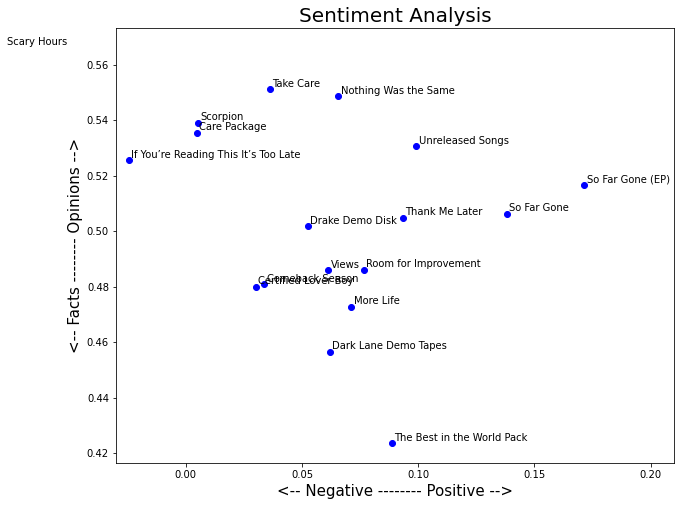

In [46]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.rcParams['figure.figsize'] = [10, 8]

for index, album in enumerate(data_corpus.index):
    x = data_corpus.polarity.loc[album]
    y = data_corpus.subjectivity.loc[album]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data_corpus.index[index], fontsize=10)
    plt.xlim(-.03, .21) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
# adjust_text(list(data_corpus.index), x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5),
#         autoalign='', only_move={'points':'y', 'text':'y'})

plt.show()

In [47]:
list(data_corpus.index)

['Care Package',
 'Certified Lover Boy',
 'Comeback Season',
 'Dark Lane Demo Tapes',
 'Drake Demo Disk',
 'If You’re Reading This It’s Too Late',
 'More Life',
 'Nothing Was the Same',
 'Room for Improvement',
 'Scary Hours',
 'Scorpion',
 'So Far Gone',
 'So Far Gone (EP)',
 'Take Care',
 'Thank Me Later',
 'The Best in the World Pack',
 'Unreleased Songs',
 'Views']